<a href="https://colab.research.google.com/github/Charliebond125/Abalone-Dataset/blob/main/Abalone_Feature_Variables_and_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster, datasets, metrics
sns.set()
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [82]:
target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone_df = pd.read_csv(target_url, header=None, prefix="V")
abalone_df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
                      'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']

In [83]:
for col_names in abalone_df.columns:
  print(abalone_df[col_names].value_counts())

M    1528
I    1342
F    1307
Name: Sex, dtype: int64
0.625    94
0.550    94
0.575    93
0.580    92
0.620    87
         ..
0.150     1
0.110     1
0.135     1
0.800     1
0.815     1
Name: Length, Length: 134, dtype: int64
0.450    139
0.475    120
0.400    111
0.500    110
0.470    100
        ... 
0.615      1
0.620      1
0.625      1
0.090      1
0.095      1
Name: Diameter, Length: 111, dtype: int64
0.150    267
0.140    220
0.155    217
0.175    211
0.160    205
0.125    202
0.165    193
0.135    189
0.145    182
0.130    169
0.120    169
0.170    160
0.100    145
0.110    135
0.115    133
0.180    131
0.090    124
0.105    114
0.185    103
0.190    103
0.095     91
0.195     78
0.080     76
0.085     74
0.200     68
0.075     61
0.070     47
0.205     45
0.065     39
0.215     31
0.060     26
0.055     25
0.210     23
0.050     18
0.220     17
0.040     13
0.225     13
0.045     11
0.230     10
0.030      6
0.235      6
0.035      6
0.025      5
0.240      4
0.250      3
0.00

In [84]:
abalone_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [85]:
abalone_df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [86]:
abalone_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole_weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked_weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera_weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell_weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


In [87]:
abalone_df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

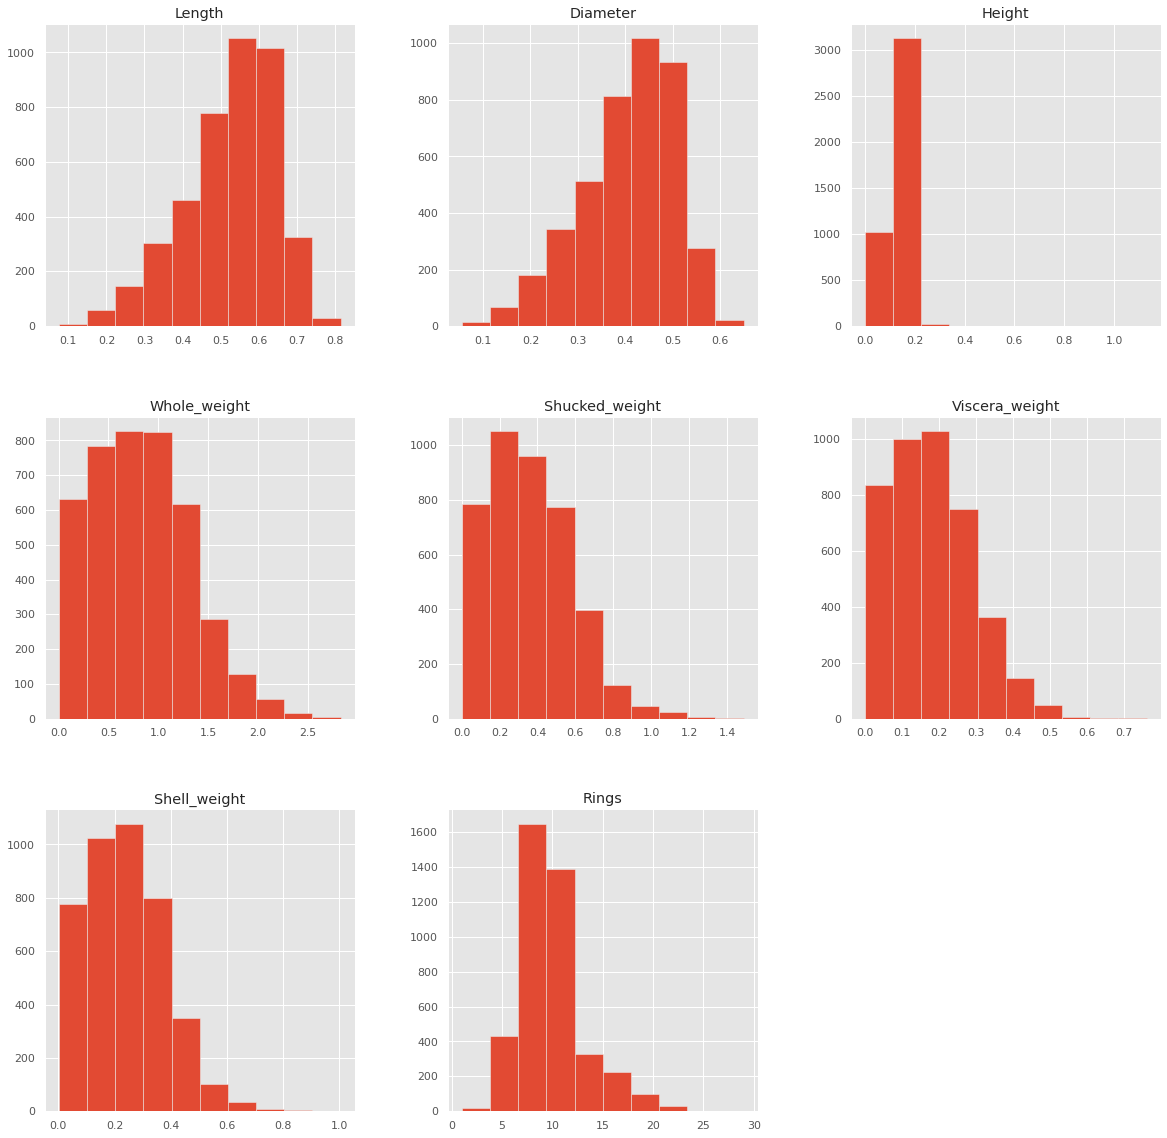

In [88]:
p_hist = abalone_df.hist(figsize = (20,20))

Text(0.5, 1.0, 'Ring distribution')

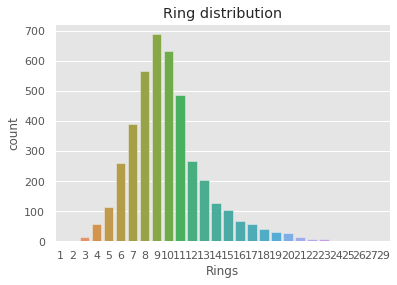

In [89]:
sns.countplot(abalone_df['Rings'])
plt.title('Ring distribution')

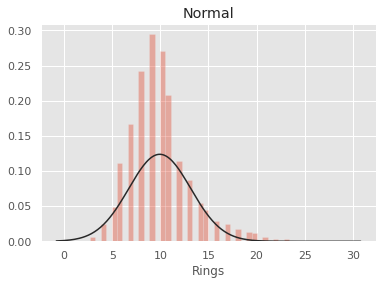

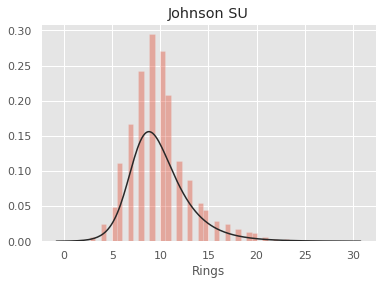

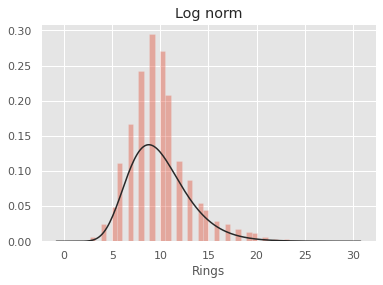

In [90]:
import scipy.stats as st

rings = abalone_df['Rings']
plt.figure(1);plt.title('Normal')
sns.distplot(rings, kde=False, fit=st.norm)
plt.figure(2); plt.title('Johnson SU')
sns.distplot(rings, kde=False, fit=st.johnsonsu)
plt.figure(3);plt.title('Log norm')
sns.distplot(rings, kde=False, fit=st.lognorm)

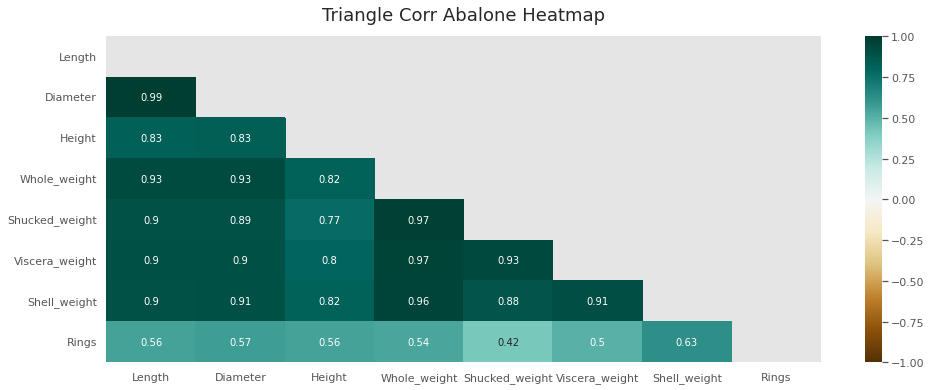

In [91]:
plt.figure(figsize=(16, 6))

mask = np.triu(np.ones_like(abalone_df.corr(), dtype=np.bool))

heatmap = sns.heatmap(abalone_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Triangle Corr Abalone Heatmap', fontdict={'fontsize':18}, pad=16);
plt.savefig('abalone_heatmap.png')
plt.show()


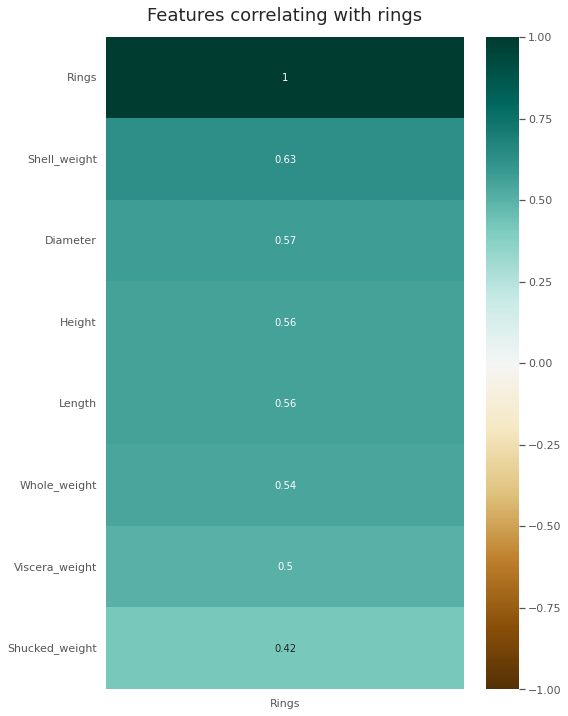

In [92]:
plt.figure(figsize=(8, 12))

heatmap = sns.heatmap(abalone_df.corr()[['Rings']].sort_values(by='Rings', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Features correlating with rings', fontdict={'fontsize':18}, pad=16);
plt.savefig('abalone_cor.png')
plt.show()


Text(0, 0.5, 'count')

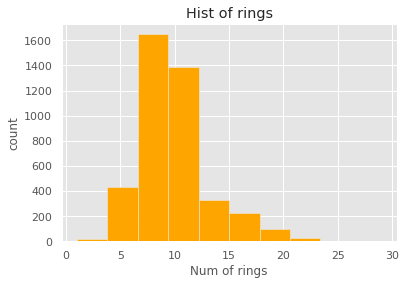

In [93]:
# histogram of rings by age
plt.hist(rings, color='orange')
plt.title('Hist of rings')
plt.xlabel('Num of rings')
plt.ylabel('count')

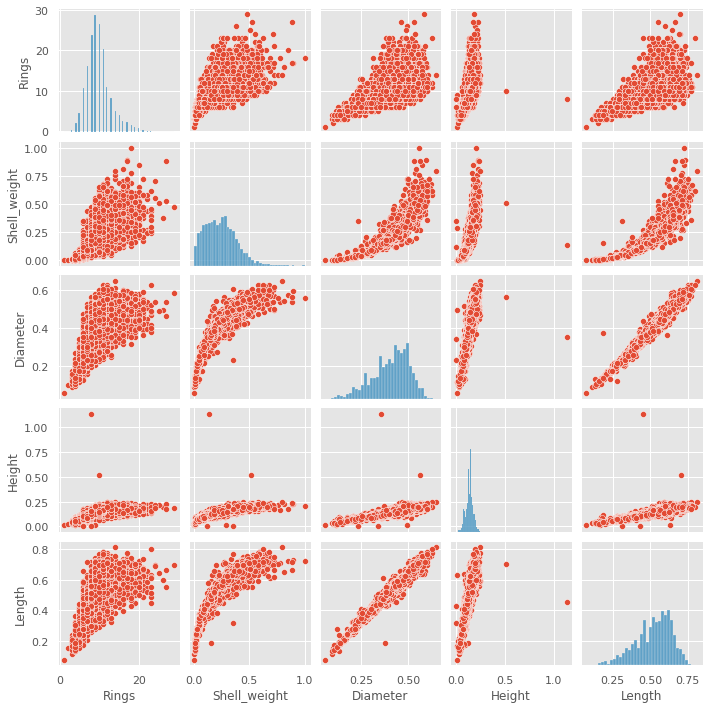

In [94]:
abalone_scatter = ['Rings', 'Shell_weight', 'Diameter', 'Height', 'Length']
sns.pairplot(abalone_df[abalone_scatter], size=2, kind = 'scatter')
plt.savefig('abalone_scatter.png')
plt.show()


In [95]:
numeric_abalone_features = abalone_df.select_dtypes(include=[np.number])
correlation_features = numeric_abalone_features.corr()

print(correlation_features['Rings'].sort_values(ascending=False))

Rings             1.000000
Shell_weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole_weight      0.540390
Viscera_weight    0.503819
Shucked_weight    0.420884
Name: Rings, dtype: float64


Text(0.5, 1.0, 'Gender count')

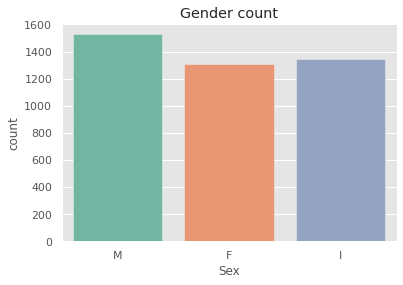

In [96]:
sns.countplot(abalone_df['Sex'], palette='Set2')
plt.title('Gender count')

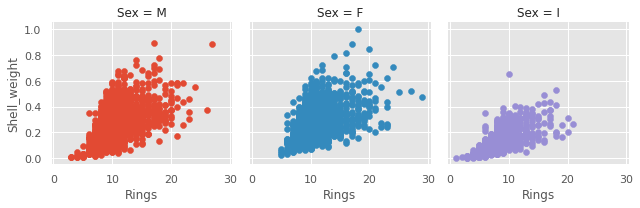

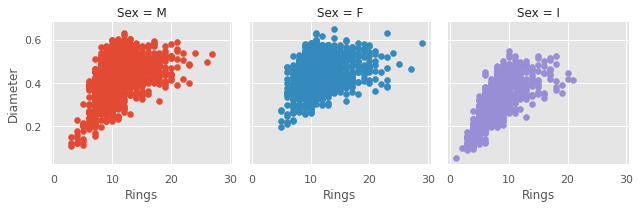

In [97]:
# Visualising the two most prominant features

sex_rings_weight = sns.FacetGrid(abalone_df, col='Sex', hue='Sex')
sex_rings_weight = sex_rings_weight.map(plt.scatter, "Rings", "Shell_weight")

sex_rings_diam = sns.FacetGrid(abalone_df, col="Sex", hue="Sex")
sex_rings_diam = sex_rings_diam.map(plt.scatter, "Rings", "Diameter")

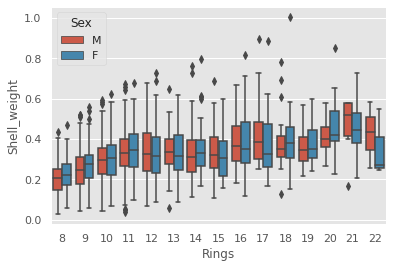

In [98]:
# Looking at outliers in our data
# based on most common feature
# using box plots based on just Male and Female attributes

abalone_outlier_box = (abalone_df.loc[abalone_df['Sex'].isin(['M', 'F'])]
                       .loc[:,["Shell_weight", "Rings", "Sex"]])

abalone_outlier_box = abalone_outlier_box[abalone_outlier_box["Rings"] >= 8]
abalone_outlier_box = abalone_outlier_box[abalone_outlier_box["Rings"] < 23]
sns.boxplot(x="Rings", y="Shell_weight", hue="Sex", data=abalone_outlier_box)
plt.savefig('M_F_box.png')
plt.show()


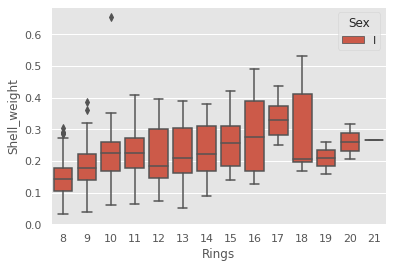

In [99]:
abalone_outlier_box_inf = (abalone_df.loc[abalone_df['Sex'].isin(['I'])]
                       .loc[:,["Shell_weight", "Rings", "Sex"]])

abalone_outlier_box_inf = abalone_outlier_box_inf[abalone_outlier_box_inf["Rings"] >= 8]
abalone_outlier_box_inf = abalone_outlier_box_inf[abalone_outlier_box_inf["Rings"] < 23]
sns.boxplot(x="Rings", y="Shell_weight", hue="Sex", data=abalone_outlier_box_inf)
plt.savefig('sex_I_box.png')
plt.show()


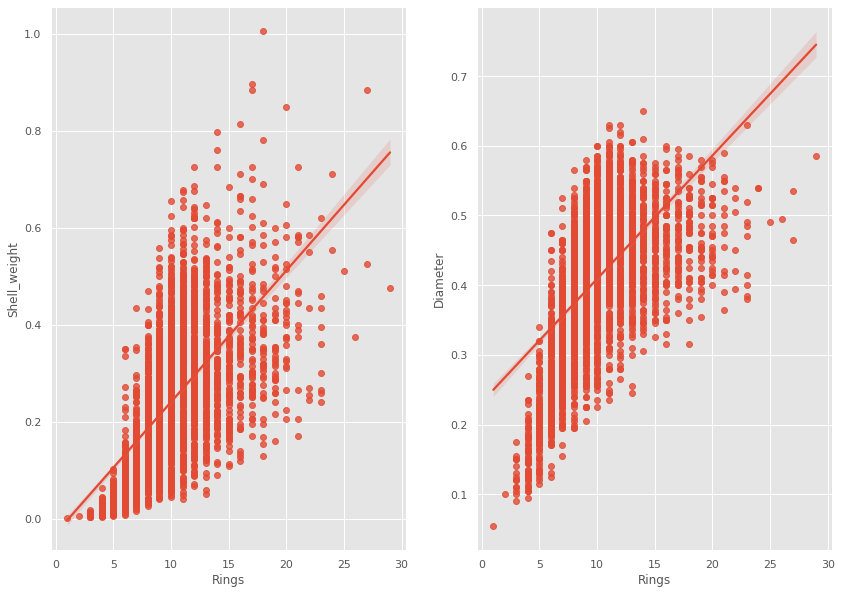

In [100]:
# Comparing two most common feature variables against linear graph

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))

Shell_weight_plot = pd.concat([abalone_df["Rings"], abalone_df["Shell_weight"]], axis=1)
sns.regplot(x="Rings", y="Shell_weight", data = Shell_weight_plot, scatter=True, fit_reg = True, ax=ax1)

Diameter_Aba_plot = pd.concat([abalone_df["Rings"],abalone_df['Diameter']], axis=1)

sns.regplot(x="Rings", y="Diameter", data=Diameter_Aba_plot, scatter=True, fit_reg=True, ax=ax2)

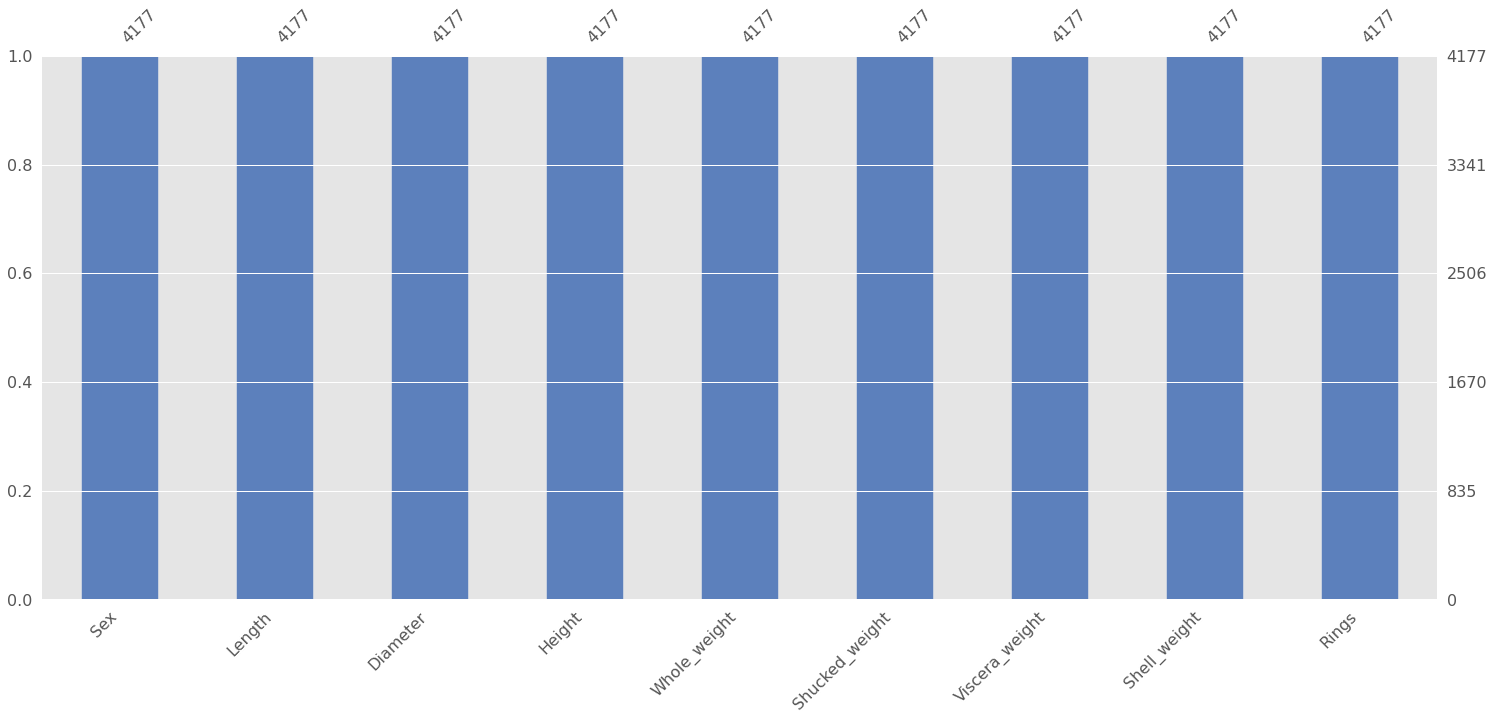

In [101]:
import missingno as msno
msno.bar(abalone_df, color=(92/255, 128/255, 188/255))

In [102]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [103]:
#encoding Sex column into int64 variables
encoded_abalone = pd.get_dummies(abalone_df)
encoded_abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole_weight    4177 non-null   float64
 4   Shucked_weight  4177 non-null   float64
 5   Viscera_weight  4177 non-null   float64
 6   Shell_weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
 8   Sex_F           4177 non-null   uint8  
 9   Sex_I           4177 non-null   uint8  
 10  Sex_M           4177 non-null   uint8  
dtypes: float64(7), int64(1), uint8(3)
memory usage: 273.4 KB


In [104]:
encoded_abalone.shape

(4177, 11)

In [105]:
from scipy import stats
z_abalone = np.abs(stats.zscore(encoded_abalone.select_dtypes(include={np.number})))
print(z_abalone)

[[0.57455813 0.43214879 1.06442415 ... 0.67483383 0.68801788 1.31667716]
 [1.44898585 1.439929   1.18397831 ... 0.67483383 0.68801788 1.31667716]
 [0.05003309 0.12213032 0.10799087 ... 1.48184628 0.68801788 0.75948762]
 ...
 [0.6329849  0.67640943 1.56576738 ... 0.67483383 0.68801788 1.31667716]
 [0.84118198 0.77718745 0.25067161 ... 1.48184628 0.68801788 0.75948762]
 [1.54905203 1.48263359 1.32665906 ... 0.67483383 0.68801788 1.31667716]]


In [106]:
# removing all data points that are below three standard deviations away from mean
abalone_outlier_st2 = encoded_abalone[(z_abalone < 2).all(axis=1)]
abalone_outlier_st3 = encoded_abalone[(z_abalone < 3).all(axis=1)]

In [107]:
print("Shape of abalone with outliers: "+str(encoded_abalone.shape))
print("Shape of abalone without outliers from 2-std: "+str(abalone_outlier_st2.shape))
print("Shape of abalone without outliers from 3-std: "+str(abalone_outlier_st3.shape))

Shape of abalone with outliers: (4177, 11)
Shape of abalone without outliers from 2-std: (3556, 11)
Shape of abalone without outliers from 3-std: (4027, 11)


In [108]:
encoded_abalone

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [109]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_std_1 = pd.DataFrame(sc_X.fit_transform(abalone_outlier_st3.drop(["Rings"],axis=1),),
                 columns = ["Length",	"Diameter",	"Height",	"Whole_weight",	"Shucked_weight",	"Viscera_weight",	"Shell_weight",	"Sex_F",	"Sex_I",	"Sex_M", ])


In [110]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_std_2 = pd.DataFrame(sc_X.fit_transform(abalone_outlier_st2.drop(["Rings"],axis=1),),
                 columns = ["Length",	"Diameter",	"Height",	"Whole_weight",	"Shucked_weight",	"Viscera_weight",	"Shell_weight",	"Sex_F",	"Sex_I",	"Sex_M", ])


In [111]:
X_std_1.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,-0.569368,-0.420274,-1.166207,-0.633156,-0.603733,-0.723057,-0.630659,-0.670525,-0.699088,1.328833
1,-1.475358,-1.463127,-1.301806,-1.265644,-1.209410,-1.231104,-1.256033,-0.670525,-0.699088,1.328833
2,0.077768,0.153294,-0.081420,-0.275805,-0.448680,-0.331135,-0.161629,1.491368,-0.699088,-0.752540
3,-0.698795,-0.420274,-0.352617,-0.628771,-0.647342,-0.597255,-0.591574,-0.670525,-0.699088,1.328833
4,-1.647928,-1.567412,-1.573003,-1.310587,-1.257865,-1.318198,-1.373290,-0.670525,1.430434,-0.752540


In [112]:
X_std_2.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,-0.699046,-0.517316,-1.351761,-0.672316,-0.643618,-0.774619,-0.669825,-0.671444,-0.696247,1.325364
1,-1.766659,-1.737680,-1.509669,-1.399632,-1.334879,-1.356290,-1.390303,-0.671444,-0.696247,1.325364
2,0.063534,0.153884,-0.088501,-0.261388,-0.466656,-0.325901,-0.129466,1.489329,-0.696247,-0.754510
3,-0.851562,-0.517316,-0.404316,-0.667273,-0.693389,-0.630586,-0.624795,-0.671444,-0.696247,1.325364
4,-1.970014,-1.859716,-1.825484,-1.451313,-1.390179,-1.456005,-1.525392,-0.671444,1.436272,-0.754510


In [113]:
print(abalone_outlier_st2.isnull().sum())

Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
Sex_F             0
Sex_I             0
Sex_M             0
dtype: int64


# KNN Classifier using Standard Deviation of 2

Below we are using the KNN classifier on a dataset where outliers beyond 2 standard deviations have been removed. This is to see if outliers beyond these paramets influence predicting the number of rings in our y value.

In [114]:
X = abalone_outlier_st2.drop("Rings", axis=1)
y = abalone_outlier_st2.Rings

In [115]:
# using test train split to scale values for KNN classifier

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=9, stratify=y)

In [116]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [117]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [118]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely

max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 28.279386712095402 % and k = [13]


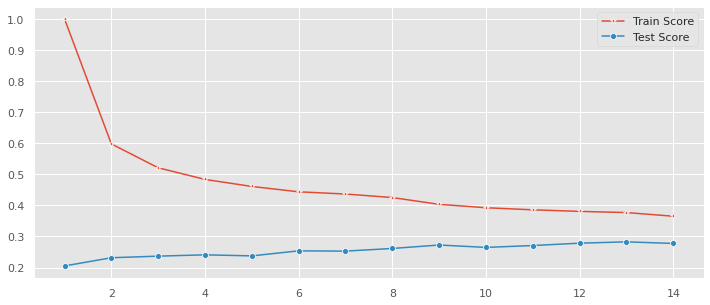

In [119]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [120]:
knn = KNeighborsClassifier(13)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.282793867120954

# KNN using Standard deviation parameter of 3

Below we are using the KNN classifier on a dataset where outliers beyond 3 standard deviations have been removed. This is to see if outliers beyond these paramets influence predicting the number of rings in our y value.

In [121]:
X = abalone_outlier_st3.drop("Rings", axis=1)
y = abalone_outlier_st3.Rings

In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=5, stratify=y)

In [123]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [124]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [125]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely

max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 27.29528535980149 % and k = [14]


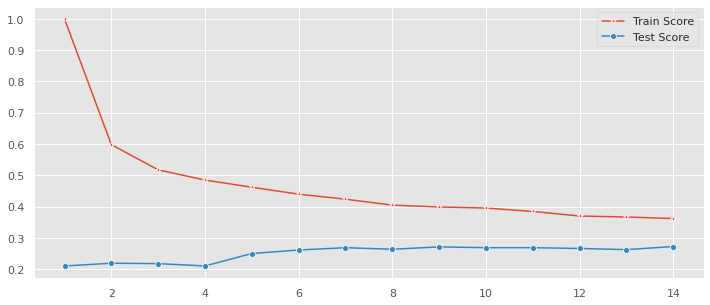

In [126]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [127]:
knn = KNeighborsClassifier(14)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.2729528535980149

In [128]:
# One last basic KNN model

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier(n_neighbors = 19, metric='minkowski', p=2)

X = encoded_abalone.drop('Rings', axis=1)
y = encoded_abalone.Rings

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))


0.26674641148325356
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.38      0.50      0.43        12
           5       0.32      0.33      0.33        21
           6       0.31      0.32      0.31        47
           7       0.30      0.40      0.34        70
           8       0.34      0.28      0.30       133
           9       0.26      0.42      0.32       137
          10       0.25      0.29      0.27       142
          11       0.20      0.24      0.22        91
          12       0.15      0.09      0.12        53
          13       0.25      0.07      0.10        46
          14       0.33      0.05      0.09        20
          15       0.00      0.00      0.00        23
          16       0.00      0.00      0.00        10
          17       0.00      0.00      0.00         8
       

In [129]:
print(confusion_matrix(y_test, y_pred))

[[ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  5  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  7  5  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  6 15 15  3  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 19 28 14  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  5 22 37 39 24  3  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4 12 25 58 19 17  1  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 13 52 41 27  6  1  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  4  7 26 23 22  6  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  2 12 16 10  5  3  0  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2 11 14 13  2  3  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  2  3  5  4  2  1  1  0  0  0  0  0  0

In [130]:
import scipy.stats
stats.mode(encoded_abalone)

ModeResult(mode=array([[0.55  , 0.45  , 0.15  , 0.2225, 0.175 , 0.1715, 0.275 , 9.    ,
        0.    , 0.    , 0.    ]]), count=array([[  94,  139,  267,    8,   11,   15,   43,  689, 2870, 2835, 2649]]))

In [131]:
parameters_GridSearch = {"n_neighbors": range(1, 100),
                         "weights": ["uniform", "distance"]}

from sklearn.model_selection import GridSearchCV
from scipy.spatial.kdtree import minkowski_distance_p
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import minkowski

from sklearn.metrics import mean_squared_error
from math import sqrt


abalone_classifier_gridsearch = GridSearchCV(KNeighborsClassifier(n_neighbors = 3, metric='minkowski'), parameters_GridSearch)
abalone_classifier_gridsearch.fit(X_train, y_train)

abalone_classifier_gridsearch.best_params_

test_grid = abalone_classifier_gridsearch.predict(X_test)

test_MSE = mean_squared_error(y_test, test_grid)
test_RMSE = sqrt(test_MSE)
test_classgrid_r2_score = abalone_classifier_gridsearch.score(X_test, test_grid)
print("Root mean sq error: ", test_RMSE)
print("R2 score: ", test_classgrid_r2_score)

Root mean sq error:  2.553728861973892
R2 score:  1.0


# KNN Regression

In [132]:
from scipy.spatial.kdtree import minkowski_distance_p
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import minkowski
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

knr = KNeighborsRegressor(n_neighbors = 3, metric=minkowski_distance_p)
knr.fit(X_train, y_train)

KNeighborsRegressor(metric=<function minkowski_distance_p at 0x7fb7ad8ab8c0>,
                    n_neighbors=3)

In [133]:
from sklearn.metrics import mean_squared_error
from math import sqrt

train_prediction = knr.predict(X_train)
mean_sq_error = mean_squared_error(y_train, train_prediction)
rmse = sqrt(mean_sq_error)
print("Root mean squared error train: ", rmse)

Root mean squared error train:  1.6311490361573053


In [134]:
test_prediction = knr.predict(X_test)
mean_sq_error_test = mean_squared_error(y_test, test_prediction)
rmse_test = sqrt(mean_sq_error_test)
print("Root mean squared error test: ", rmse_test)

Root mean squared error test:  2.3665891669140233


In [135]:
# gridsearchcv
# first to define our parameters

parameters_GridSearch = {"n_neighbors": range(1, 100),
                         "weights": ["uniform", "distance"]}

abalone_gridsearch = GridSearchCV(KNeighborsRegressor(), parameters_GridSearch)
abalone_gridsearch.fit(X_train, y_train)

abalone_gridsearch.best_params_

test_grid = abalone_gridsearch.predict(X_test)

test_MSE = mean_squared_error(y_test, test_grid)
test_RMSE = sqrt(test_MSE)
test_grid_r2_score = abalone_gridsearch.score(X_test, test_grid)
print("RMSE score: ", test_RMSE)
print("r2 score: ", test_grid_r2_score)

RMSE score:  2.2019980663446757
r2 score:  1.0


In [136]:
# performing bagging to further reduce RMSE

from sklearn.ensemble import BaggingRegressor

best_bag_k = abalone_gridsearch.best_params_["n_neighbors"]
best_k_weights = abalone_gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(n_neighbors=best_bag_k, weights=best_k_weights)
bagged_knn.fit(X_train, y_train)

# now need to import bagging more from sklearn

bagging_knn_model = BaggingRegressor(bagged_knn, n_estimators=100)
bagging_knn_model.fit(X_train, y_train)

# Now to calculate bagged KNN
test_preds_grid = bagging_knn_model.predict(X_test)
test_bagged_mse = mean_squared_error(y_test, test_preds_grid)
test_bagged_rmse = np.sqrt(test_bagged_mse)
test_bagged_r2_score = bagged_knn.score(X_test, test_preds_grid)
print(test_bagged_rmse)
print("r2 score: ", test_bagged_r2_score)


2.1987353125096325
r2 score:  0.9976088923832992


# Conclusion
KNN used in both regression and classification shows instances of over fitting. Even after using pruning methods such as Gridsearch and Bagging, it was not completely possible to remove features which may be impacting the results. 

Use of bagging outliers which are more than two standard deviations away gave a better RMSE compared to three standard deviations. 

However, with further feature engineering and hyperparameter tuning of the models, there is the possibility for future improvement on the scores given.

# Random forest Classification and Regression

Using Random Forest to build Classification and Regression models to fit onto the abalone data in predicting the age of abelone

In [137]:
# First we need to import the appropriate models from the librarys for Random Forest

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error


In [138]:
# Building cross validation for Regression Forest

# A pipeline helps to prevent statistics from leaking into test data from trained model in cross validation

rf_forest_pipeline = make_pipeline(RandomForestRegressor(random_state=5))

rf_forest_scores = cross_val_score(rf_forest_pipeline, X, y, scoring ="neg_mean_absolute_error")

print("Mean Absolute Error %2f" %(-1 * rf_forest_scores.mean()))

Mean Absolute Error 1.596059


In [139]:
import missingno as msno

import os

In [140]:
abalone_df.info

<bound method DataFrame.info of      Sex  Length  Diameter  ...  Viscera_weight  Shell_weight  Rings
0      M   0.455     0.365  ...          0.1010        0.1500     15
1      M   0.350     0.265  ...          0.0485        0.0700      7
2      F   0.530     0.420  ...          0.1415        0.2100      9
3      M   0.440     0.365  ...          0.1140        0.1550     10
4      I   0.330     0.255  ...          0.0395        0.0550      7
...   ..     ...       ...  ...             ...           ...    ...
4172   F   0.565     0.450  ...          0.2390        0.2490     11
4173   M   0.590     0.440  ...          0.2145        0.2605     10
4174   M   0.600     0.475  ...          0.2875        0.3080      9
4175   F   0.625     0.485  ...          0.2610        0.2960     10
4176   M   0.710     0.555  ...          0.3765        0.4950     12

[4177 rows x 9 columns]>

In [141]:
abalone_df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [142]:
abalone_df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [143]:
# as isnull has returned a correct boolean value indicating all 4177 entries
# this matches the entire dataset so we cna be confident we have no null values
len (abalone_df.isnull())

4177

In [144]:
# here we will use Z-Scores to give an indictation into how far away
# the standard deviation is in the data we want to use in our regressor

z_score_rf = np.abs(stats.zscore(abalone_df.select_dtypes(include=[np.number])))
print(z_score_rf)

[[0.57455813 0.43214879 1.06442415 ... 0.72621157 0.63821689 1.57154357]
 [1.44898585 1.439929   1.18397831 ... 1.20522124 1.21298732 0.91001299]
 [0.05003309 0.12213032 0.10799087 ... 0.35668983 0.20713907 0.28962385]
 ...
 [0.6329849  0.67640943 1.56576738 ... 0.97541324 0.49695471 0.28962385]
 [0.84118198 0.77718745 0.25067161 ... 0.73362741 0.41073914 0.02057072]
 [1.54905203 1.48263359 1.32665906 ... 1.78744868 1.84048058 0.64095986]]


In [145]:
# As before, we will look to remove data points which are more than three standard deviations away 
# this ensures we are working with data that is as free from outliers as can be using z score

abalone_outliers = abalone_df[(z_score_rf < 3).all(axis=1)]

print("shape of abalone without outliers:" + str(abalone_outliers))

# This has now given us a reduction in data points from 4177 to 4027. 
# This means we have reduced the amount of outliers by 150 erroneous data points.

shape of abalone without outliers:     Sex  Length  Diameter  ...  Viscera_weight  Shell_weight  Rings
0      M   0.455     0.365  ...          0.1010        0.1500     15
1      M   0.350     0.265  ...          0.0485        0.0700      7
2      F   0.530     0.420  ...          0.1415        0.2100      9
3      M   0.440     0.365  ...          0.1140        0.1550     10
4      I   0.330     0.255  ...          0.0395        0.0550      7
...   ..     ...       ...  ...             ...           ...    ...
4172   F   0.565     0.450  ...          0.2390        0.2490     11
4173   M   0.590     0.440  ...          0.2145        0.2605     10
4174   M   0.600     0.475  ...          0.2875        0.3080      9
4175   F   0.625     0.485  ...          0.2610        0.2960     10
4176   M   0.710     0.555  ...          0.3765        0.4950     12

[4027 rows x 9 columns]


In [146]:
# Same as we will be doing for our regression dataset, we will be encoding our
# Sex columns into binary values for float64 and int64.
# This will make it easier in our models performing correctly as intended

""" We will need to check the cardinality however to ensure that we do not 
suffer from the curse of dimensions problem seen in datasets with large number of catagorical values"""


low_cardinal = [cname for cname in abalone_outliers.columns if abalone_outliers[cname].nunique() < 10 
                and abalone_outliers[cname].dtype == "object"]

num_cols = [cname for cname in abalone_outliers.columns if 
            abalone_outliers[cname].dtype in ['int64', 'float64']]

my_columns = low_cardinal + num_cols
abalone_predictions = abalone_outliers[my_columns]


In [147]:
encoded_abalone = pd.get_dummies(abalone_predictions)

encoded_abalone.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [148]:
f_train_X, f_test_X, f_train_y, f_test_y = train_test_split(X, y)

forest_split = make_pipeline(RandomForestRegressor(random_state=25))

forest_split.fit(f_train_X, f_train_y)

rf_predict = forest_split.predict(f_test_X)
rf_r2 = forest_split.score(f_test_X, rf_predict)

print("Accuracy of RF: ", forest_split.score(f_test_X, f_test_y))
print("Mean Absolute Error: ", str(mean_absolute_error(rf_predict, f_test_y)))
print("r2 score: ", rf_r2)

Accuracy of RF:  0.5849170702085092
Mean Absolute Error:  1.4916842105263157
r2 score:  1.0


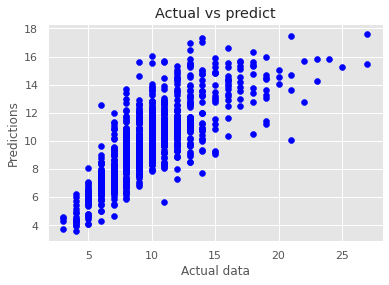

In [149]:
plt.scatter(f_test_y, rf_predict, color='blue')
plt.xlabel('Actual data')
plt.ylabel('Predictions')
plt.title('Actual vs predict')
plt.savefig('actual_vs_pred.png')
plt.show()

# Random Forest Classification Ensemble

Use of Classification Matrix for Random Forest available from the SKlearn library.

In [150]:
# Random Forest Classifcation

# Using pre processed data and assigning to X_train and X_test.
# Catagorical values have already been converted to binary UTF-8
X = encoded_abalone.drop(['Rings'], axis=1)
y = encoded_abalone['Rings']
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

standard_scale = StandardScaler()
standard_scale.fit_transform(X)

#X_train = encoded_abalone.fit_transform(X_train)
#X_test = encoded_abalone.transform(X_test)


array([[-0.56936804, -0.42027443, -1.16620737, ..., -0.67052519,
        -0.6990884 ,  1.32883283],
       [-1.47535808, -1.4631268 , -1.30180583, ..., -0.67052519,
        -0.6990884 ,  1.32883283],
       [ 0.07776771,  0.15329438, -0.08141969, ...,  1.49136828,
        -0.6990884 , -0.7525401 ],
       ...,
       [ 0.68176107,  0.72686319,  1.81695876, ..., -0.67052519,
        -0.6990884 ,  1.32883283],
       [ 0.89747298,  0.83114842,  0.32537569, ...,  1.49136828,
        -0.6990884 , -0.7525401 ],
       [ 1.63089349,  1.56114509,  1.54576184, ..., -0.67052519,
        -0.6990884 ,  1.32883283]])

In [151]:
randm_f_classifier = RandomForestClassifier(random_state=0)

randm_f_classifier.fit(X_train, y_train)

y_pred = randm_f_classifier.predict(X_test)

print("Model accuracy with 10 trees : {0:0.4f}".format(accuracy_score(y_test, y_pred)))

Model accuracy with 10 trees : 0.2419


In [152]:
rfc_100 = RandomForestClassifier(n_estimators = 100, random_state = 0)

rfc_100.fit(X_train, y_train)

y_pred_100 = rfc_100.predict(X_test)

print(accuracy_score(y_test, y_pred_100))

0.24193548387096775


#Feature selection for Random Forest

The accuracy with Random Forest on all features of the model gives an incredibly low accuracy. 

With some Feature Selection we can single out the best indicators for age based on the data given. Once this has been completed, we can then build the model using these features and see if this improves the models accuracy.

In [153]:
# Initialising the classifier from 100 n-estimators
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# fitting the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [154]:
# Gives us a display of the feature scores from most to least in descending order
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print(feature_scores)

Shell_weight      0.162930
Shucked_weight    0.156372
Viscera_weight    0.149854
Whole_weight      0.144568
Length            0.115954
Diameter          0.114637
Height            0.103466
Sex_M             0.018541
Sex_F             0.017285
Sex_I             0.016392
dtype: float64


The most important 4 features given above is Shell_weight, Shucked_weight, Whole_weight and Viscera_weight as indicators of Abalone Age.

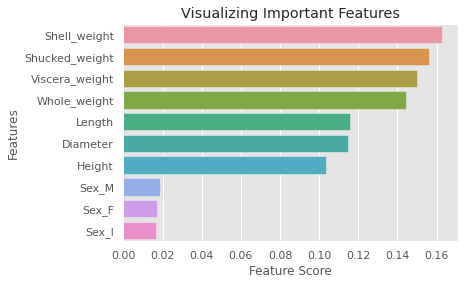

In [155]:
# Creating a seaborn bar plot to visualise the most relevant features

sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.savefig('visual_important_feats.png')
plt.show()

From the above plot we can see the least important variables in the data is sex. 

If we go ahead and rebuild the model, but remove Sex_M, Sex_F, and Sex_I this should give an improvement on the accuracy.

In [156]:
X = encoded_abalone.drop(['Sex_M', 'Sex_I', 'Sex_F'], axis=1)
y = encoded_abalone['Rings']

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# splitting the data into training and test sets

From here, I will look at re building the Forest Classifier model and ascertain the accuracy.

In [158]:
clf = RandomForestClassifier(n_estimators=100, random_state = 42)
clf.fit(X_train, y_train)
clf_y_pred = clf.predict(X_test)

print("Model accuracy score with highlighted variables removed: {0:0.4f}".format(accuracy_score(y_test, clf_y_pred)))

Model accuracy score with highlighted variables removed: 0.9305


In [159]:
print(confusion_matrix(y_test, clf_y_pred))
print(classification_report(y_test, clf_y_pred))

[[  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   8   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  14   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  42   1   2   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  62   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 117   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 141   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0 131   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   1  88   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1  69   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0  35   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   5  17   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   2  17   0   2   0   0]
 [  0   0   0   0   0   0   0   0   0   1   1   4   6   4   1   1   0]
 [  0 

In [160]:
rf_rebuild_test_mse = mean_squared_error(y_test, clf_y_pred)
rf_rmse_rebuild = np.sqrt(rf_rebuild_test_mse)
rf_least_squares_rebuild = clf.score(X_test, clf_y_pred)

print("Root mean squared error test: ", rf_rmse_rebuild)
print("Least Squares R2 score: ", rf_least_squares_rebuild)


Root mean squared error test:  0.6359768087286632
Least Squares R2 score:  1.0
